In [ ]:
#データの読み込み
import torch
import pandas as pd
header = ["question", "answer"]
dataset = pd.read_csv("/content/drive/My Drive/Chatbot/dataset/dialogs.txt", sep='\t',header=None, names=header)
device = torch.device("cuda")
# https://www.kaggle.com/grafstor/simple-dialogs-for-chatbot

In [ ]:
dataset

,question,answer
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [ ]:
#辞書の作成
import torch
from torch.utils.data import DataLoader


class EncoderDecoder(object):
    def __init__(self, sentences, bos=False, eos=False):
        # word_to_idの辞書
        self.w2i = {}
        # id_to_wordの辞書
        self.i2w = {}
        # 文頭の記号を入れるか
        self.bos = bos
        # 文末の記号を入れるか
        self.eos = eos
        # 予約語(パディング, 文章の始まり)
        self.special_chars = ['<pad>', '<s>', '</s>', '<unk>']
        self.bos_char = self.special_chars[1]
        self.eos_char = self.special_chars[2]
        self.oov_char = self.special_chars[3]
        # 全ての単語を読み込んで辞書作成
        self.fit(sentences)

    # コールされる関数
    def __call__(self, sentence):
        return self.transform(sentence)

    # 辞書作成
    def fit(self, sentences):
        self._words = set()

        # 未知の単語の集合を作成する
        for sentence in sentences:
            self._words.update(sentence)

        # 予約語分ずらしてidを振る
        self.w2i = {w: (i + len(self.special_chars))
                    for i, w in enumerate(self._words)}

        # 予約語を辞書に追加する(<pad>:0, <s>:1, </s>:2, <unk>:3)
        for i, w in enumerate(self.special_chars):
            self.w2i[w] = i

        # word_to_idの辞書を用いてid_to_wordの辞書を作成する
        self.i2w = {i: w for w, i in self.w2i.items()}

    # 1文をidに変換する
    def transform(self, sentence):
        # 指定があれば始まりと終わりの記号を追加する
        if self.bos:
            sentence = [self.bos_char] + sentence
        if self.eos:
            sentence = sentence + [self.eos_char]
        output = self.encode(sentence)

        return output

    # 1文ずつidにする
    def encode(self, sentence):
        output = []
        for w in sentence:
            if w not in self.w2i:
                idx = self.w2i[self.oov_char]
            else:
                idx = self.w2i[w]
            output.append(idx)

        return output

In [ ]:
#入力サイズを同じ長さに揃える
def padding(sentence, max_length, pad):
  length = len(sentence)
  sent = sentence.copy()
  sent.append("</s>")
  for i in range(max_length - length):
    sent.append(pad)
  return sent

In [ ]:
def calc_max(matrix):
  leng = []
  for i in range(len(matrix)):
    leng.append(len(matrix[i]))
  max_length = np.max(leng)
  return max_length

In [ ]:
a = dataset.answer[0]

In [ ]:
import re
def arrange_data(text):
  text = str(text)
  punctuation = '"#$%&\()*+-/:;<=>[\\]^_`{|}~'
  text = text.lower()
  all_text = ''.join([c for c in text if c not in punctuation])
  all_text = all_text.replace(".", " . ")
  all_text = all_text.replace("!", " ! ")
  all_text = all_text.replace("?", " ? ")
  s_text = all_text.split()
  return s_text

In [ ]:
pre_questions1 = dataset.question 
pre_answers1 = dataset.answer

pre_questions2 = []
pre_answers2 = []
all_vocabs = []

data_num = len(dataset)
for i in range(data_num):
  pre_questions2.append(arrange_data(pre_questions1[i]))
  pre_answers2.append(arrange_data(pre_answers1[i]))
  all_vocabs.append(arrange_data(pre_answers1[i]))
  all_vocabs.append(arrange_data(pre_questions1[i]))


In [ ]:
pre_questions2[0:5]

[['hi,', 'how', 'are', 'you', 'doing', '?'],
 ["i'm", 'fine', '.', 'how', 'about', 'yourself', '?'],
 ["i'm", 'pretty', 'good', '.', 'thanks', 'for', 'asking', '.'],
 ['no', 'problem', '.', 'so', 'how', 'have', 'you', 'been', '?'],
 ["i've", 'been', 'great', '.', 'what', 'about', 'you', '?']]

In [ ]:
transform_vocab = EncoderDecoder(all_vocabs, bos=True, eos=False)
vocab_size = len(transform_vocab.w2i)

In [ ]:
print(transform_vocab.i2w[5])
print(transform_vocab.w2i["."])

says
1619


In [ ]:
all_vocabs[2000:2005]

[['oh,',
  'no',
  'you',
  "don't",
  '.',
  'puppies',
  "don't",
  'eat',
  'vegetables',
  '.'],
 ['no',
  'problem',
  '.',
  "i'll",
  'give',
  'him',
  'food',
  'off',
  'my',
  'plate',
  '.'],
 ['how', 'many', 'are', 'there', '?'],
 ['look', 'at', 'all', 'these', 'kittens', '!'],
 ['eight', '.']]

In [ ]:
pre_questions2[0:5]


[['hi,', 'how', 'are', 'you', 'doing', '?'],
 ["i'm", 'fine', '.', 'how', 'about', 'yourself', '?'],
 ["i'm", 'pretty', 'good', '.', 'thanks', 'for', 'asking', '.'],
 ['no', 'problem', '.', 'so', 'how', 'have', 'you', 'been', '?'],
 ["i've", 'been', 'great', '.', 'what', 'about', 'you', '?']]

In [ ]:
import numpy as np
question_max = calc_max(pre_questions2)
answer_max = calc_max(pre_answers2)
print("question_max: ", question_max)
print("answer_max: ", answer_max)

def data_input_tokens(data_num, sentences, max_length, pad, transform):
  long_tensor = sentences[data_num]
  pad_tensor = padding(long_tensor, max_length, pad)
  if transform != None:
    pad_tensor = transform(pad_tensor)
  input_tensor = torch.LongTensor(pad_tensor).to(device)
  return input_tensor

def set_input_data(data_num):
  question = data_input_tokens(data_num, pre_questions2, question_max, '<pad>', transform_vocab)
  answer = data_input_tokens(data_num, pre_answers2, answer_max, '<pad>', transform_vocab)

  return question, answer
input_size = question_max+2

question_max:  21
answer_max:  21


In [ ]:
a, b = set_input_data(0)

In [ ]:
pad_index = 0
sos_index = 1
eos_index = 2
period = transform_vocab.w2i["."]
device2 = torch.device("cpu")
def decode_ids(ids):
  ids = ids.to(device2).detach().clone().numpy()
  new_ids = []
  answer = []
  for i in range(len(ids)):
    id = ids[i]
    if (id != sos_index) and (id != eos_index) and (id != pad_index):
      new_ids.append(id)
    
  for i in range(len(new_ids)):
    answer.append(transform_vocab.i2w[new_ids[i]])
 
  new_answer = ' '.join([str(n) for n in answer])
  return new_answer

def decode_ids_NotCuda(ids):
  new_ids = []
  answer = []
  for i in range(len(ids)):
    id = ids[i]
    if (id != sos_index) and (id != eos_index) and (id != pad_index):
      new_ids.append(id)
    
  for i in range(len(new_ids)):
    answer.append(transform_vocab.i2w[new_ids[i]])
 
  new_answer = ' '.join([str(n) for n in answer])
  return new_answer

In [ ]:
decode_ids(b)

"i'm fine . how about yourself ?"

In [ ]:
#Encoder
import torch
import torch.nn as nn
import torch.nn.functional as F
hidden_size = 256
embedding_size = 50
drop_out = 0
n_layer_en = 1

class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.bigru = nn.GRU(embedding_size, hidden_size, n_layer_en, bidirectional=True, batch_first=True, dropout=drop_out)
    
    self.linear_e = nn.Linear(2*hidden_size, 2*hidden_size, bias=False)
    
  def forward(self, question):
    question_embedded = self.embedding_layer(question.unsqueeze(0))

    encoder_out, hidden = self.bigru(question_embedded)
    question_fwd = hidden[0:hidden.size(0):2]
    question_bwd = hidden[1:hidden.size(0):2]
    question_encoded = torch.cat([question_fwd, question_bwd], dim=2)

    question_encoded = self.linear_e(question_encoded)
    question_hidden = torch.stack([question_encoded[0, 0, :hidden_size], question_encoded[0, 0, hidden_size:]]).unsqueeze(1)

    return encoder_out, question_hidden, question_encoded

encoder = Encoder()
encoder = encoder.to(device)

In [ ]:
question, answer = set_input_data(0)
encoder_out, question_hidden, question_encoded = encoder(question)
print(encoder_out.size(), question_hidden.size(), question_encoded.size())

torch.Size([1, 23, 512]) torch.Size([2, 1, 256]) torch.Size([1, 1, 512])


In [ ]:
v = torch.rand(1, 1, 10)
mask = torch.tensor([1, 1, 1, 0, 0, 0, 0, 0, 0, 0]).unsqueeze(0).unsqueeze(0)
v.data.masked_fill_(
                mask == 0, -float('Inf')
            )
v = F.softmax(v, dim=-1)
v

tensor([[[0.2687, 0.3518, 0.3795, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000]]])

In [ ]:
question

tensor([   1,  249,  584, 2493, 2061,  970, 2629,    2,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       device='cuda:0')

In [ ]:
question.unsqueeze(0).unsqueeze(0).size()
v = torch.rand(1, 1, input_size).to(device)
v.data.masked_fill_(
                question == 0, -float('Inf')
            )
v = F.softmax(v, dim=-1)
v

tensor([[[0.0958, 0.1587, 0.0834, 0.1118, 0.1006, 0.1664, 0.1898, 0.0935,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]]],
       device='cuda:0')

In [ ]:
s = encoder_out
a = torch.rand(1, 1, input_size).to(device)
print(s.size(), a.size())
c = torch.bmm(a, s)
print(c.size())

torch.Size([1, 23, 512]) torch.Size([1, 1, 23])
torch.Size([1, 1, 512])


In [ ]:
#Attention
n_layer_de = 2
class Attention(nn.Module):
  def __init__(self):
    super(Attention, self).__init__()

    self.linearV = nn.Linear(hidden_size, 1, bias=False)
    self.linearS = nn.Linear(2*hidden_size, hidden_size)
    self.linearH = nn.Linear(n_layer_de*hidden_size, hidden_size)
    #self.cover_layer = nn.Linear(input_size, hidden_size, bias=False)
    
  def forward(self, s, h, mask):
    S = self.linearS(s)
    H = self.linearH(h)
    #C = self.cover_layer(cover)
    v = torch.tanh(self.linearV(S + H)).squeeze(-1).unsqueeze(0)
    
    if mask is not None:
      mask = mask.unsqueeze(0).unsqueeze(0)
      v.data.masked_fill_(
                mask == 0, -6.0
            )
    a = F.softmax(v, dim=-1)
    context = torch.bmm(a, s)
    

    return a, context

attention = Attention()
attention = attention.to(device)

In [ ]:
#cover = torch.zeros(1, 1, input_size).to(device)
s = encoder_out
h = torch.rand(1, 1, 2*hidden_size).to(device)
mask = question
a, context = attention(s, h, mask)
print(a.size(), context.size())
print(a)

torch.Size([1, 1, 23]) torch.Size([1, 1, 512])
tensor([[[0.1236, 0.1255, 0.1303, 0.1163, 0.1211, 0.1261, 0.1238, 0.1289,
          0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003,
          0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003, 0.0003]]],
       device='cuda:0', grad_fn=<SoftmaxBackward>)


In [ ]:
#Decoder
n_layer_de = 2
eps = 1e-40
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.gru = nn.GRU(embedding_size, hidden_size, n_layer_de, bidirectional=False, batch_first=True, dropout=drop_out)
    self.attention = Attention()
    self.linear_d = nn.Linear(3*hidden_size, hidden_size)
    self.vocab_linear = nn.Linear(hidden_size, vocab_size)
    
  def forward(self, encoder_out, question_encoded, decoder_out, decoder_hidden, question, step):

    input_emb = self.embedding_layer(decoder_out)

    gru_out, gru_hidden = self.gru(input_emb, decoder_hidden)

    h = torch.cat([gru_hidden[0], gru_hidden[1]], dim=-1).unsqueeze(0)

    a, context = attention(encoder_out, h, question)
    context_out = torch.cat([gru_out, context], dim=-1)

    decoder_out = F.relu(self.linear_d(context_out))
    decoder_out = F.log_softmax(self.vocab_linear(decoder_out)+eps, dim=-1)    
    return gru_hidden, decoder_out, a

decoder = Decoder()
decoder = decoder.to(device)

In [ ]:
decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
print(decoder_out.size())
decoder_hidden = question_hidden
decoder_hidden, decoder_out, a = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, 0)
print(decoder_hidden.size(), decoder_out.size())
decoder_out = decoder_out.argmax(-1)
decoder_hidden, decoder_out, a = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, 0)

torch.Size([1, 1])
torch.Size([2, 1, 256]) torch.Size([1, 1, 2804])


In [ ]:
criterion = nn.NLLLoss(reduction="sum", ignore_index=pad_index)
import torch.optim as optim
lr = 0.00001
encoder_optimizer = optim.Adam(encoder.parameters(), lr=lr, weight_decay=1e-6)
decoder_optimizer = optim.Adam(decoder.parameters(), lr=lr, weight_decay=1e-6)

In [ ]:
def train(data_num, teacher_forcing_p):
  encoder.train()
  decoder.train()
  encoder_optimizer.zero_grad()
  decoder_optimizer.zero_grad()

  question, answer = set_input_data(data_num)

  rand = np.random.rand()
  if teacher_forcing_p > rand:
      teacher_forcing = True
  else:
      teacher_forcing = False

  length = answer_max + 2

  #encoder
  encoder_out, question_hidden, question_encoded = encoder(question)

  decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
  decoder_hidden = question_hidden
  
  
  a_index = []
  log_logit_index = []
  for step in range(length):
    #decoder

    decoder_hidden, decoder_out, a = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, step)
    log_logit_index.append(decoder_out.squeeze(0))
    if teacher_forcing:
      decoder_out = answer[step].unsqueeze(0).unsqueeze(0)
    else:
      decoder_out = decoder_out.argmax(-1)
    
    a_index.append(a)


  a_index = torch.cat(a_index, dim=0)

  log_logit_index = torch.cat(log_logit_index, dim=0)
  loss = criterion(log_logit_index, answer)

  loss.backward()
  encoder_optimizer.step()
  decoder_optimizer.step()

  return loss.item()

def test(data_num, teacher_forcing_p):
  encoder.eval()
  decoder.eval()

  question, answer = set_input_data(data_num)

  rand = np.random.rand()
  if teacher_forcing_p > rand:
      teacher_forcing = True
  else:
      teacher_forcing = False

  length = answer_max + 2

  #encoder
  encoder_out, question_hidden, question_encoded = encoder(question)

  decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
  decoder_hidden = question_hidden


  a_index = []

  log_logit_index = []
  word_index = []
  for step in range(length):
    #decoder

    decoder_hidden, decoder_out, a = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, step)
    log_logit_index.append(decoder_out.squeeze(0))
    if teacher_forcing:
      decoder_out = answer[step].unsqueeze(0).unsqueeze(0)
    else:
      decoder_out = decoder_out.argmax(-1)
    word_index.append(decoder_out)


    a_index.append(a)

  word_index = torch.cat(word_index, dim=-1).squeeze(0)

  a_index = torch.cat(a_index, dim=0)

  log_logit_index = torch.cat(log_logit_index, dim=0)
  loss = criterion(log_logit_index, answer)

  return loss.item(), word_index, a_index

epoch:  0
loss:  54.713768797397854
loss_test:  59.32749838399879
question:  then i add butter, salt, and pepper.
gold answer:  can i have all those cans of tomato sauce you bought for your pasta?
generated text:  i i . . .
 
epoch:  1
loss:  44.52604366207121
loss_test:  50.970430305957855
question:  what else do we get from cows?
gold answer:  we get hamburgers and steak.
generated text:  i i . .
 
epoch:  2
loss:  43.63326515007017
loss_test:  51.20973643541339
question:  yes. i've never been there.
gold answer:  i was there when i was a kid.
generated text:  i you .
 
epoch:  3
loss:  41.46483897447587
loss_test:  52.805172246933004
question:  what are you standing on?
gold answer:  a couple of dictionaries and some textbooks.
generated text:  i you . . . .
 
epoch:  4
loss:  41.43641167020802
loss_test:  53.685480773925796
question:  when do you have to be at the airport?
gold answer:  i have to be there two hours early.
generated text:  i you . . . .
 
epoch:  5
loss:  40.5125905

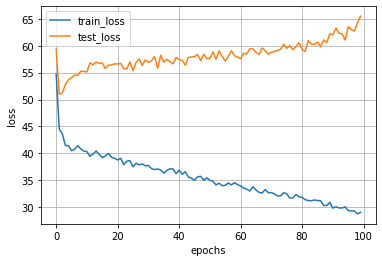

In [ ]:
dataset_num = len(dataset)
train_loss_history = []
test_loss_history = []
batch_size = 2000
for i in range(100):
  loss = 0
  loss_test = 0
  for j in range(batch_size):
    a = np.random.choice(list(range(0, 2500)))
    b = np.random.choice(list(range(2500, dataset_num)))
    loss_i = train(a, 0.9)
    loss_test_i, word_index, a_index = test(b, 0)

    loss += loss_i / batch_size
    loss_test += loss_test_i / batch_size
  print("epoch: ",i)
  print("loss: ",loss)
  print("loss_test: ",loss_test)
  print("question: ", pre_questions1[b])
  print("gold answer: ", pre_answers1[b])
  text = decode_ids(word_index)
  print("generated text: ", text)
  print(' ')
  
  train_loss_history.append(loss)

  test_loss_history.append(loss_test)


import matplotlib.pyplot as plt


plt.plot(train_loss_history, marker=' ', label='train_loss')
plt.plot(test_loss_history, marker=' ', label='test_loss')
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def call_test(data_num):
  loss_test_i, word_index, a_index = test(data_num, 0)
  text = decode_ids(word_index)
  print("loss_test: ",loss_test)
  print("question: ", pre_questions1[data_num])
  print("gold answer: ", pre_answers1[data_num])
  print("generated answer: ", text)

In [ ]:
for i in range(15):
  ss = i
  call_test(ss)
  print("________")

loss_test:  65.4741208615304
question:  hi, how are you doing?
gold answer:  i'm fine. how about yourself?
generated answer:  i don't know . .
________
loss_test:  65.4741208615304
question:  i'm fine. how about yourself?
gold answer:  i'm pretty good. thanks for asking.
generated answer:  i don't want to go to go . .
________
loss_test:  65.4741208615304
question:  i'm pretty good. thanks for asking.
gold answer:  no problem. so how have you been?
generated answer:  i don't want to
________
loss_test:  65.4741208615304
question:  no problem. so how have you been?
gold answer:  i've been great. what about you?
generated answer:  i don't want to . . .
________
loss_test:  65.4741208615304
question:  i've been great. what about you?
gold answer:  i've been good. i'm in school right now.
generated answer:  i don't want to . . .
________
loss_test:  65.4741208615304
question:  i've been good. i'm in school right now.
gold answer:  what school do you go to?
generated answer:  i don't want t

In [ ]:
torch.save(encoder.state_dict(), "/content/drive/My Drive/Chatbot/eval2/encoder_normalAttentionSeq2SeqDialogs.pth")
torch.save(decoder.state_dict(), "/content/drive/My Drive/Chatbot/eval2/decoder_normalAttentionSeq2SeqDialogs.pth")

In [ ]:
#Encoder
import torch
import torch.nn as nn
import torch.nn.functional as F
hidden_size = 256
embedding_size = 50
drop_out = 0
n_layer_en = 1

class Encoder(nn.Module):
  def __init__(self):
    super(Encoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.bigru = nn.GRU(embedding_size, hidden_size, n_layer_en, bidirectional=True, batch_first=True, dropout=drop_out)
    
    self.linear_e = nn.Linear(2*hidden_size, 2*hidden_size, bias=False)
    
  def forward(self, question):
    question_embedded = self.embedding_layer(question.unsqueeze(0))

    encoder_out, hidden = self.bigru(question_embedded)
    question_fwd = hidden[0:hidden.size(0):2]
    question_bwd = hidden[1:hidden.size(0):2]
    question_encoded = torch.cat([question_fwd, question_bwd], dim=2)

    question_encoded = self.linear_e(question_encoded)
    question_hidden = torch.stack([question_encoded[0, 0, :hidden_size], question_encoded[0, 0, hidden_size:]]).unsqueeze(1)

    return encoder_out, question_hidden, question_encoded

encoder = Encoder()
encoder = encoder.to(device)

n_layer_de = 2
class Attention(nn.Module):
  def __init__(self):
    super(Attention, self).__init__()

    self.linearV = nn.Linear(hidden_size, 1, bias=False)
    self.linearS = nn.Linear(2*hidden_size, hidden_size)
    self.linearH = nn.Linear(n_layer_de*hidden_size, hidden_size)
    self.cover_layer = nn.Linear(input_size, hidden_size, bias=False)
    
  def forward(self, s, h, mask, cover):
    S = self.linearS(s)
    H = self.linearH(h)
    C = self.cover_layer(cover)
    v = torch.tanh(self.linearV(S + H + C)).squeeze(-1).unsqueeze(0)
    
    if mask is not None:
      mask = mask.unsqueeze(0).unsqueeze(0)
      v.data.masked_fill_(
                mask == 0, -6.0
            )
    a = F.softmax(v, dim=-1)
    context = torch.bmm(a, s)
    next_cover = cover + a

    return a, next_cover, context


n_layer_de = 2
eps = 1e-40
class Decoder(nn.Module):
  def __init__(self):
    super(Decoder, self).__init__()

    self.embedding_layer = nn.Embedding(vocab_size, embedding_size, padding_idx=pad_index)

    self.gru = nn.GRU(embedding_size, hidden_size, n_layer_de, bidirectional=False, batch_first=True, dropout=drop_out)
    self.attention = Attention()
    self.linear_d = nn.Linear(3*hidden_size, hidden_size)
    self.vocab_linear = nn.Linear(hidden_size, vocab_size)
    
  def forward(self, encoder_out, question_encoded, decoder_out, decoder_hidden, question, cover, step):

    input_emb = self.embedding_layer(decoder_out)

    gru_out, gru_hidden = self.gru(input_emb, decoder_hidden)

    h = torch.cat([gru_hidden[0], gru_hidden[1]], dim=-1).unsqueeze(0)

    a, next_cover, context = attention(encoder_out, h, question, cover)
    context_out = torch.cat([gru_out, context], dim=-1)

    decoder_out = F.relu(self.linear_d(context_out))
    decoder_out = F.log_softmax(self.vocab_linear(decoder_out)+eps, dim=-1)    
    return gru_hidden, decoder_out, a, next_cover

decoder = Decoder()
decoder = decoder.to(device)

In [ ]:
dir(torch.load(encoder_path))

In [ ]:
encoder = Encoder()
decoder = Decoder()
encoder_path = "/content/drive/My Drive/Chatbot/eval2/encoder_normalAttentionSeq2SeqDialogs.pth"
decoder_path = "/content/drive/My Drive/Chatbot/eval2/decoder_normalAttentionSeq2SeqDialogs.pth"
encoder.load_state_dict(torch.load(encoder_path))
decoder.load_state_dict(torch.load(decoder_path))
encoder = encoder.to(device)
decoder = decoder.to(device)

In [ ]:
encoder = encoder.to(device)
decoder = decoder.to(device)
call_test(2777)

NameError: ignored

In [ ]:
def test_eval(data_num, teacher_forcing_p, alpha):
  encoder.eval()
  decoder.eval()

  question, answer = set_input_data(data_num)

  rand = np.random.rand()
  if teacher_forcing_p > rand:
      teacher_forcing = True
  else:
      teacher_forcing = False

  length = answer_max + 2

  #encoder
  encoder_out, question_hidden, question_encoded = encoder(question)

  decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
  decoder_hidden = question_hidden
  next_cover = torch.zeros(1, 1, input_size).to(device).requires_grad_()
  cover_index = []
  a_index = []

  log_logit_index = []
  word_index = []
  for step in range(length):
    #decoder
    cover = next_cover
    decoder_hidden, decoder_out, a, next_cover = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, next_cover, step)
    log_logit_index.append(decoder_out.squeeze(0))
    if teacher_forcing:
      decoder_out = answer[step].unsqueeze(0).unsqueeze(0)
    else:
      decoder_out = decoder_out.argmax(-1)
    word_index.append(decoder_out)

    cover_index.append(cover)
    a_index.append(a)

  word_index = torch.cat(word_index, dim=-1).squeeze(0)

  cover_index = torch.cat(cover_index, dim=0)
  a_index = torch.cat(a_index, dim=0)
  cov_loss = torch.sum(torch.min(cover_index, a_index))
  log_logit_index = torch.cat(log_logit_index, dim=0)
  loss = criterion(log_logit_index, answer) + alpha*cov_loss

  return loss.item(), word_index, a_index, question

In [ ]:
def decode_ids_test(ids):
  ids = ids.to(device2).detach().clone().numpy()
  new_ids = []
  answer = []
  for i in range(len(ids)):
    id = ids[i]
    new_ids.append(id)
    
  for i in range(len(new_ids)):
    answer.append(transform_vocab.i2w[new_ids[i]])
 
  
  return answer

In [ ]:
def test(data_num, teacher_forcing_p):
  encoder.eval()
  decoder.eval()

  question, answer = set_input_data(data_num)

  rand = np.random.rand()
  if teacher_forcing_p > rand:
      teacher_forcing = True
  else:
      teacher_forcing = False

  length = answer_max + 2

  #encoder
  encoder_out, question_hidden, question_encoded = encoder(question)

  decoder_out = torch.LongTensor([sos_index]).to(device).unsqueeze(0)
  decoder_hidden = question_hidden


  a_index = []

  log_logit_index = []
  word_index = []
  for step in range(length):
    #decoder

    decoder_hidden, decoder_out, a = decoder(encoder_out, question_encoded, decoder_out, decoder_hidden, question, step)
    log_logit_index.append(decoder_out.squeeze(0))
    if teacher_forcing:
      decoder_out = answer[step].unsqueeze(0).unsqueeze(0)
    else:
      decoder_out = decoder_out.argmax(-1)
    word_index.append(decoder_out)


    a_index.append(a)

  word_index = torch.cat(word_index, dim=-1).squeeze(0)

  a_index = torch.cat(a_index, dim=0)

  log_logit_index = torch.cat(log_logit_index, dim=0)
  loss = criterion(log_logit_index, answer)

  return loss.item(), word_index, a_index, question

In [ ]:
import seaborn as sns
def visualize_attention(data_num):
  loss,word_index,a_index, question = test(data_num, 0)
  a_index2 = a_index.squeeze(1).to(device2).detach().clone().numpy()
  a_index2 = np.transpose(a_index2)
  index = decode_ids_test(question)
  column = decode_ids_test(word_index)
  df = pd.DataFrame(data=a_index2, index=index, columns=column)

  sns.heatmap(df,linewidths=.5,square=True,cmap='Blues',xticklabels=1,yticklabels=1)
  call_test(data_num)

NameError: ignored

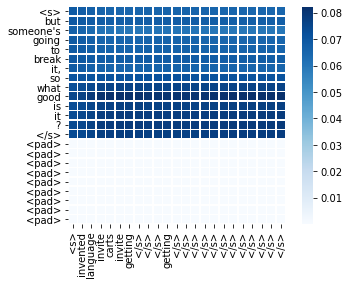

In [ ]:
visualize_attention(2777)

NameError: ignored

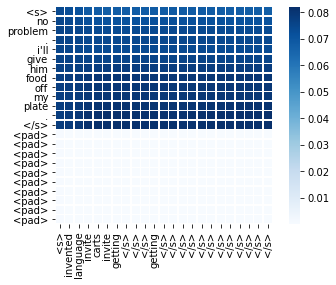

In [ ]:
visualize_attention(1000)

In [ ]:
visualize_attention(12)

NameError: ignored

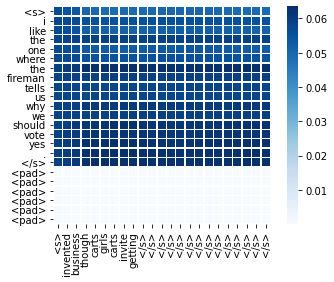

In [ ]:
visualize_attention(3500)

In [ ]:
visualize_attention(3333)

In [ ]:
dataset_num

In [ ]:
for i in decoder.parameters():
  print(i)

In [ ]:
a = np.random.choice(list(range(0, 1800)))

In [ ]:
answer